In [29]:
# Importing necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels.api as sm

In [32]:
# Connect to the database
db_path = './data/climate_data.db'
conn = sqlite3.connect(db_path)

In [33]:
# Read the tables from the database
climate_change_data = pd.read_sql_query("SELECT * FROM climate_change", conn)
display(climate_change_data.head())

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [34]:
climate_risk_index = pd.read_sql_query("SELECT * FROM climate_risk", conn)
display(climate_risk_index.head())

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,0.0,0.0,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,0.0,0.0,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,0.0,0.0,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,0.0,0.0,Slovenia,135,124.50,114,0.00,114,0,135,0.0000,135,0.000,SVN,Slovenia
4,4,5,0.0,0.0,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [35]:
# Data Preprocessing

# Convert date column to datetime format
climate_change_data['Date'] = pd.to_datetime(climate_change_data['Date'])

# Check for missing values and drop them
climate_change_data.dropna(inplace=True)
climate_risk_index.dropna(inplace=True)

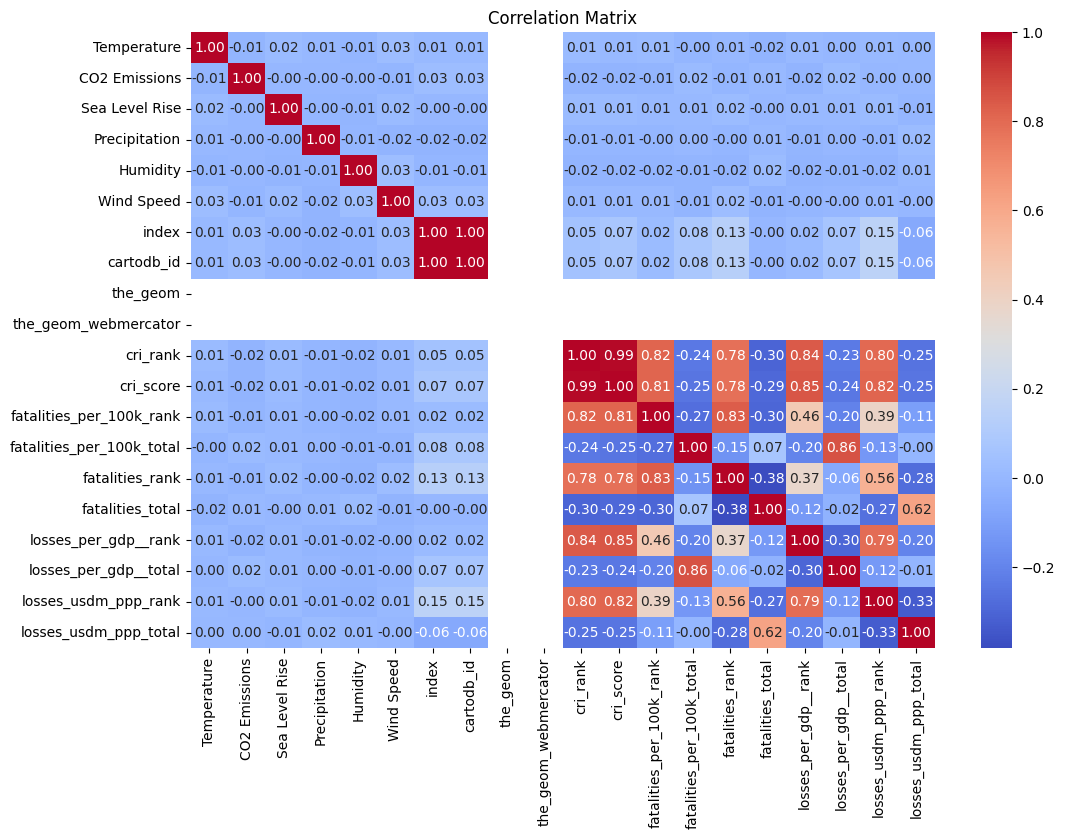

In [46]:
# Correlation Analysis

# Merge datasets on the common attribute 'Country'
merged_data = pd.merge(climate_change_data, climate_risk_index, left_on='Country', right_on='country')

# Calculate correlation matrix with numeric columns only
numeric_columns = merged_data.select_dtypes(include='number').columns
corr_matrix = merged_data[numeric_columns].corr()

# Display correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Focus on specific correlations
required_columns = ['Temperature', 'CO2 Emissions', 'Sea Level Rise', 'cri_score', 'losses_per_gdp__rank']
correlations = merged_data[required_columns].corr()
display(correlations)

,Temperature,CO2 Emissions,Sea Level Rise,cri_score,losses_per_gdp__rank
Temperature,1.000000,-0.009860,0.015040,0.012024,0.007163
CO2 Emissions,-0.009860,1.000000,-0.002027,-0.015272,-0.017018
Sea Level Rise,0.015040,-0.002027,1.000000,0.013334,0.008626
cri_score,0.012024,-0.015272,0.013334,1.000000,0.849798
losses_per_gdp__rank,0.007163,-0.017018,0.008626,0.849798,1.000000


In [42]:
economic_loss_column = 'losses_per_gdp__rank'
climate_metrics = ['Temperature', 'CO2 Emissions', 'Sea Level Rise']

for metric in climate_metrics:
    correlation = merged_data[metric].corr(merged_data[economic_loss_column])
    print(f"Correlation between {metric} and {economic_loss_column}: {correlation}")

Correlation between Temperature and losses_per_gdp__rank: 0.007162833890462997
Correlation between CO2 Emissions and losses_per_gdp__rank: -0.01701813522895095
Correlation between Sea Level Rise and losses_per_gdp__rank: 0.008626103270337759


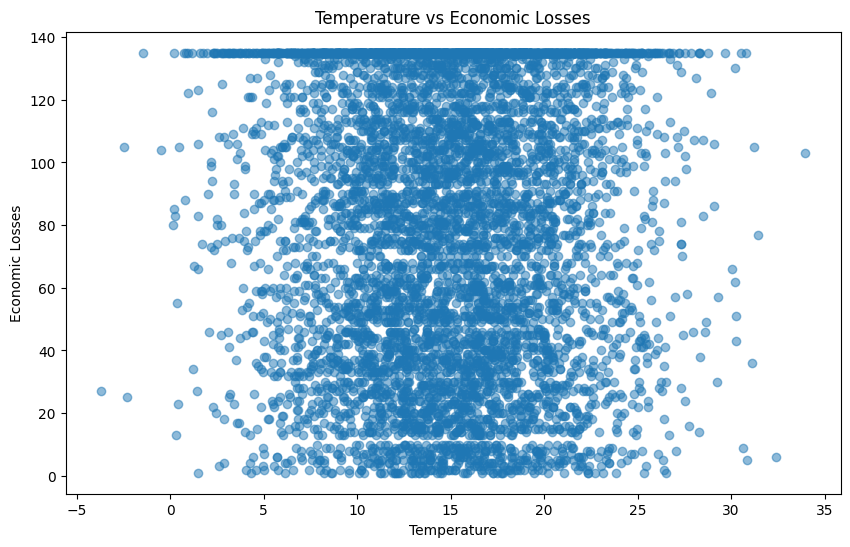

In [39]:
# Visualization
# Scatter plot of Temperature vs Economic Losses
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Temperature'], y, alpha=0.5)
plt.title('Temperature vs Economic Losses')
plt.xlabel('Temperature')
plt.ylabel('Economic Losses')
plt.show()

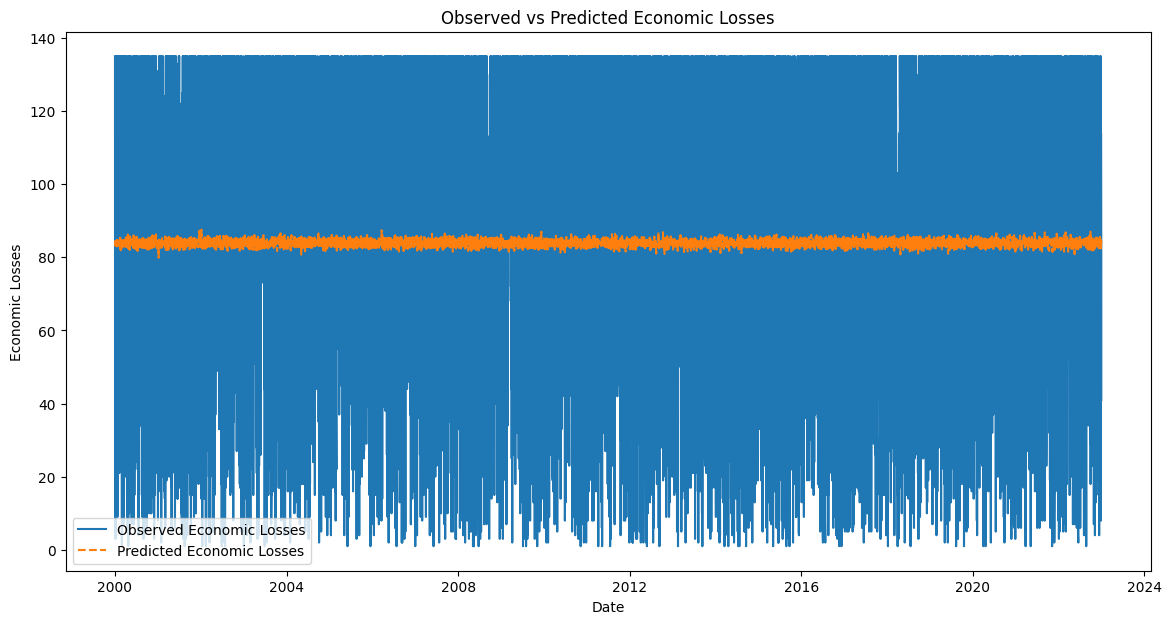

In [47]:
# Line plot for observed vs predicted economic losses
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], y, label='Observed Economic Losses')
plt.plot(merged_data['Date'], predictions, label='Predicted Economic Losses', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Economic Losses')
plt.title('Observed vs Predicted Economic Losses')
plt.legend()
plt.show()

In [41]:
# Closing the database connection
conn.close()